# White Balance

Faisal Qureshi      
http://www.vclab.ca

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

!pip install pathlib
import pathlib


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [21]:
image_file = pathlib.Path('colorful.png')
print(image_file)

colorful.png


In [22]:
image = cv2.imread(str(image_file))

In [23]:
print(image.shape)

(1360, 908, 3)


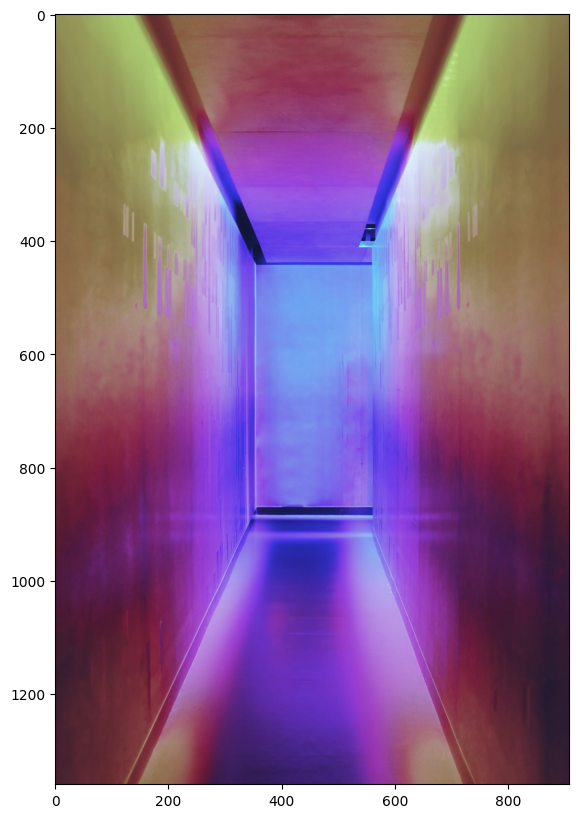

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [25]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

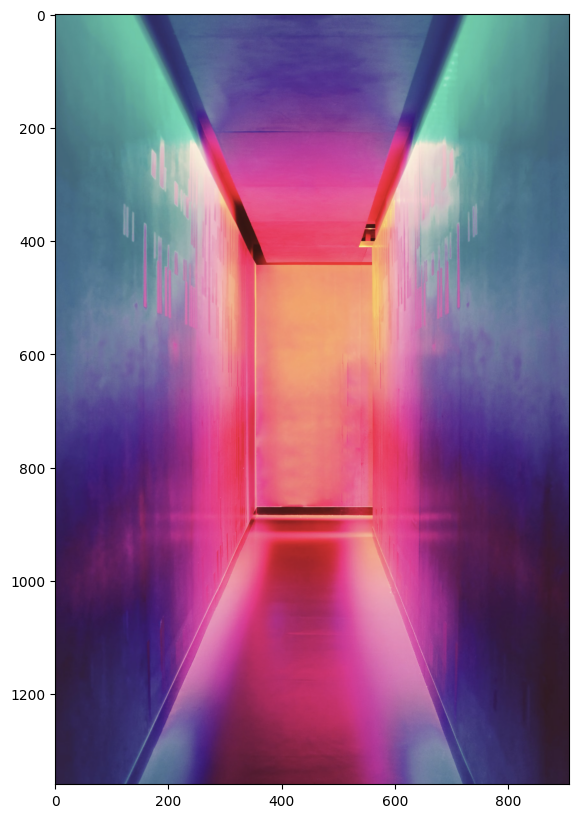

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [27]:
print(image.shape)

(1360, 908, 3)


In [28]:
channel_r = image[:,:,0]
channel_g = image[:,:,1]
channel_b = image[:,:,2]

In [29]:
def visualize_channel(channel, color_key=None):
    """
    channel: a hxw grayscale image
    color_key: one of 'r','g','b'
    """
    h, w = channel.shape
    result = np.zeros((h,w,3), dtype=channel.dtype)
    if color_key == 'r':
        result[:,:,0] = channel
    elif color_key == 'g':
        result[:,:,1] = channel
    elif color_key == 'b':
        result[:,:,2] = channel
    else:
        for i in range(3):
            result[:,:,i] = channel
        
    return result

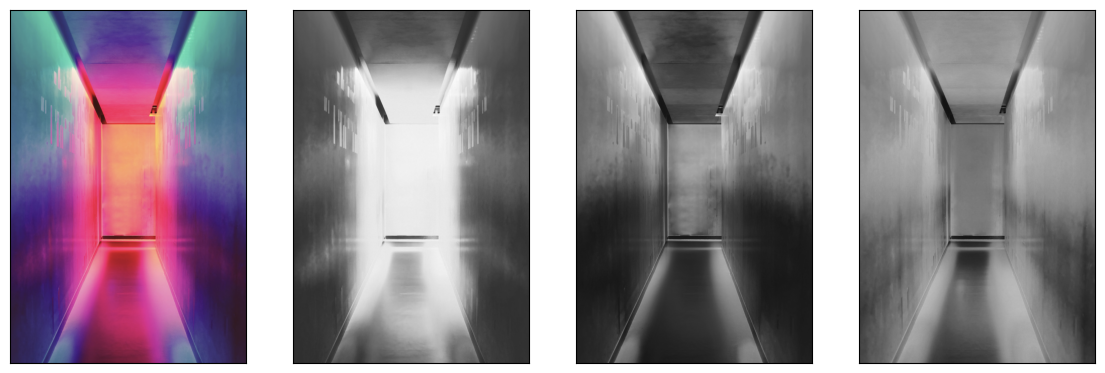

In [30]:
plt.figure(figsize=(14,40))
plt.subplot(1,4,1)
plt.imshow(image)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.subplot(1,4,2)
plt.imshow(visualize_channel(channel_r))
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.subplot(1,4,3)
plt.imshow(visualize_channel(channel_g))
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.subplot(1,4,4)
plt.imshow(visualize_channel(channel_b))
plt.gca().set_xticks([])
plt.gca().set_yticks([]);

In [31]:
print(image.shape)
print(image.reshape(-1,3).shape)

(1360, 908, 3)
(1234880, 3)


In [32]:
mean_r, mean_g, mean_b = np.average(image.reshape(-1,3),0)
mean_gray = (mean_r + mean_g + mean_b) / 3.0
scale_r = mean_gray / mean_r
scale_g = mean_gray / mean_g
scale_b = mean_gray / mean_b

image_whitebalanced = np.empty(image.shape, dtype=np.uint8)
image_whitebalanced[:,:,0] = np.clip(image[:,:,0] * scale_r, 0, 255).astype(np.uint8)
image_whitebalanced[:,:,1] = np.clip(image[:,:,1] * scale_g, 0, 255).astype(np.uint8)
image_whitebalanced[:,:,2] = np.clip(image[:,:,2] * scale_b, 0, 255).astype(np.uint8)

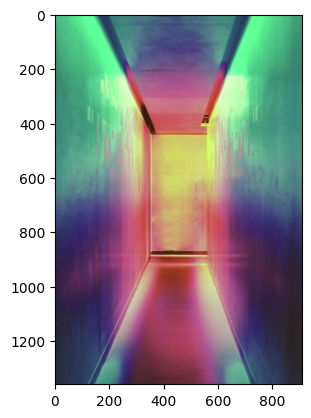

In [33]:
plt.imshow(image_whitebalanced)

In [34]:
image_whitebalanced2 = np.empty(image.shape, dtype=np.uint8)
image_whitebalanced2[:,:,0] = np.clip(image[:,:,0] * mean_g/mean_r, 0, 255).astype(np.uint8)
image_whitebalanced2[:,:,1] = np.clip(image[:,:,1] * 1., 0, 255).astype(np.uint8)
image_whitebalanced2[:,:,2] = np.clip(image[:,:,2] * mean_g/mean_b, 0, 255).astype(np.uint8)

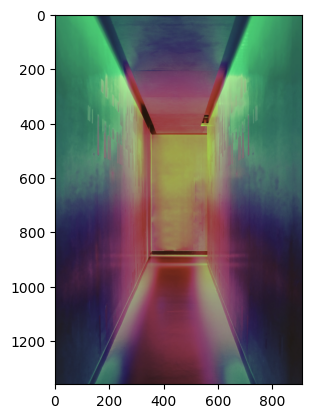

In [35]:
plt.imshow(image_whitebalanced2)